[![Open All Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MukundVarmaT/SHAASTRA_FUND_DL/blob/master/NLP/NLP.ipynb)

<h1 align="center">Natural Language Processing</h1>

Natural Language Processing or NLP is a branch of Machine Learning focused towards making computers understand the human language in the form of text, speech, etc. 

## Why is NLP difficult?
There are various challenges in NLP. Some of them are:
- **Text Preprocessing**: Large amount of textual data when scraped from websites or extracted from documents are not clean and contain a lot of gibberish. Even something as naive as identifying word or sentence boundaries is an important task. 
- **Building context**: A word gets its meaning from the context of the sentence or the words surrounding it. Many a times, the same word can have different meanings when used at different locations. Even different words can mean the same thing (synonyms). Eg:
    - In different sentences -  "We went to the **bank** to rob", "We went fishing at the river **bank**".
    - In the same sentence - "I **ran** to the store because I **ran** out of milk". 
    - Synonyms - "I have a **tiny** bag", "I have a **small** bag"
- **Complexity**: Human language is very complex and diverse. There are different languages, different ways in which people talk, write, spell, etc making it more and more challenging. Building a large text corpus with all these variabilities is difficult and infeasible.
- **Word representation**: Representing words in a form understandable by machines is a very difficult task. 

## Tokenization

Every large piece of text can be broken down into sentences, words, characters, etc. This process of breaking down in called as tokenization. There are different forms of tokenization - word tokenization, sentence tokenization, etc. 

In [1]:
text = "Wow this is great! Natural Language Processing is indeed fun."

# this is quite a naive task and can be done using the split method. 
# However, to make thing simpler, we will be using nltk library
import nltk
# tokenization is done by splitting on punctuations, etc. Hence we need to download "punkt"
nltk.download("punkt")
from nltk.tokenize import word_tokenize, sent_tokenize

# word tokenization
print(word_tokenize(text))
# sentence tokenization
print(sent_tokenize(text))

['Wow', 'this', 'is', 'great', '!', 'Natural', 'Language', 'Processing', 'is', 'indeed', 'fun', '.']
['Wow this is great!', 'Natural Language Processing is indeed fun.']


[nltk_data] Downloading package punkt to
[nltk_data]     /home/sneezygiraffe/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


While sentences are a strong way of representing text, they can be further broken down into words. In NLP, we mostly deal with words and how they can be represented.

Lets take three sentences.
Sentence 1: "This movie is very scary and long"
Sentence 2: "This movie is not scary and is slow"
Sentence 3: "This movie is spooky and good"

Hence the vocabulary in this case would be: ‘This’, ‘movie’, ‘is’, ‘very’, ‘scary’, ‘and’, ‘long’, ‘not’, ‘slow’, ‘spooky’, ‘good’.

## Bag of Words
The idea behind BOW is that every word is replaced with its count in the particular sentence. 

|Sentence|This|movie|is|very|scary|and|long|not|slow|spooky|good|
|---|---|---|---|---|---|---|---|---|---|---|---|
|1|1|1|1|1|1|1|1|0|0|0|0|
|2|1|1|2|0|0|1|1|0|1|0|0|
|3|1|1|1|0|0|0|1|0|0|1|1|

**Disadvantages**
- More words implies a larger vocabulary, making the vector large and sparse. 
- In sentence 2, it can be noticed that "is" is given a weight 2 but does not convey much to the context of the sentence.

## TF-IDF
Lets break it down

**Term Frequency (TF)**: measure of how frequenty a word t appears in document d.
![](assets/TF.jpg)
**Inverse Document Frequency (IDF)**: measure of how important a term is. 
![](assets/IDF.jpg)

|Sentence|This|movie|is|very|scary|and|long|not|slow|spooky|good|
|---|---|---|---|---|---|---|---|---|---|---|---|
|1|0|0|0|0.068|0.025|0|0.068|0|0|0|0|
|2|0|0|0|0|0.022|0|0|0.06|0.06|0|0|
|3|0|0|0|0|0|0|0|0|0|0.08|0.08|

**To conclude the TF-IDF values are higher if, the word is rare in all documents combined but frequent in a single document.**

## Stemming and Lemmatisation

Words like "children" & "child", "cars" & "car" convey the same meaning. Hence retaining them individually only makes the vectors more sparse and large. Hence its very important to remove them. 

Stemming is the method of using predefined rules to transform the word to its stem. Please note that the stem need not be a valid word. 
Lemmatization on the other hand will always be a valid word because the lemma will belong to a dictionary. 

In [2]:
import pandas as pd
from nltk.stem import PorterStemmer, LancasterStemmer, WordNetLemmatizer
nltk.download('wordnet')


# Compare stemmer and lemmatizer
porter = PorterStemmer()
lancaster = LancasterStemmer()
lemmatizer = WordNetLemmatizer()

def normalize_words(words, pos='v'):
    normalized_words = pd.DataFrame(index=words, columns=['Porter', 'Lancaster', 'Lemmatizer'])
    for word in words:
        normalized_words.loc[word,'Porter'] = porter.stem(word)
        normalized_words.loc[word,'Lancaster'] = lancaster.stem(word)
        normalized_words.loc[word,'Lemmatizer'] = lemmatizer.lemmatize(word, pos=pos)
    return normalized_words

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/sneezygiraffe/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
# normalize_words(['apples', 'pears', 'tasks', 'children', 'earrings', 'dictionary', 'marriage', 'connections', 'universe', 'university'], pos='n')
# normalise_text(['pie', 'globe', 'house', 'knee', 'angle', 'acetone', 'time', 'brownie', 'climate', 'independence'], pos='n')
# normalise_text(['wrote', 'thinking', 'remembered', 'relies', 'ate', 'gone', 'won', 'ran', 'swimming', 'mistreated'], pos='v')

## N-Grams

In all the above cases, each word is considered to be independent. But to build context, its always important to look at the surrounding words.  Hence instead of splitting words individually, they are divided into chunks of words.

Sentence: “The cow jumps over the moon”

- Bigram: ["the cow", "cow jumps", "jumps over", "over the", "the moon"]
- Trigram: ["the cow jumps", "cow jumps over", "jumps over the", "over the moon"]

In [4]:
from nltk import ngrams
sentence = "The cow jumps over the moon"
print(list(ngrams(sentence.split(), 2)))
print(list(ngrams(sentence.split(), 3)))

[('The', 'cow'), ('cow', 'jumps'), ('jumps', 'over'), ('over', 'the'), ('the', 'moon')]
[('The', 'cow', 'jumps'), ('cow', 'jumps', 'over'), ('jumps', 'over', 'the'), ('over', 'the', 'moon')]


In [5]:
import pandas as pd
# sst1 dataset from https://nlp.stanford.edu/sentiment/
data = pd.read_csv("https://raw.githubusercontent.com/MukundVarmaT/SHAASTRA_FUND_DL/master/NLP/assets/sst_data.csv")
data.head()

,sentence,label,split
0,The Rock is destined to be the 21st Century 's...,1,1
1,The gorgeously elaborate continuation of `` Th...,1,1
2,If you sometimes like to go to the movies to h...,1,2
3,"Emerges as something rare , an issue movie tha...",1,2
4,Offers that rare combination of entertainment ...,1,2


In [6]:
import re

# first we need to do some cleaning

# take the stopwords
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words("english")
# print(stopwords)

lemmatizer = WordNetLemmatizer()
def process_text(text):
    # make lower case and remove extra spaces
    text = str(text).lower()
    # remove punctuations
    text = re.sub(r'[^\w\s]', '', text)
    # convert to word tokens
    tokens = text.split()
    # remove stop words
    tokens = [t for t in tokens if t not in stopwords]
    # lemmatize
    tokens = [lemmatizer.lemmatize(t) for t in tokens]
    # convert back to string
    text = " ".join(tokens)
    return text

data["sentence_clean"] = data["sentence"].apply(lambda x: process_text(x))
data.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/sneezygiraffe/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,sentence,label,split,sentence_clean
0,The Rock is destined to be the 21st Century 's...,1,1,rock destined 21st century new conan going mak...
1,The gorgeously elaborate continuation of `` Th...,1,1,gorgeously elaborate continuation lord ring tr...
2,If you sometimes like to go to the movies to h...,1,2,sometimes like go movie fun wasabi good place ...
3,"Emerges as something rare , an issue movie tha...",1,2,emerges something rare issue movie honest keen...
4,Offers that rare combination of entertainment ...,1,2,offer rare combination entertainment education


In [7]:
# split into train and test
data_train, data_test = data[data["split"] == 1], data[data["split"] == 3]
# get the labels
y_train = data_train["label"].values
y_test = data_test["label"].values

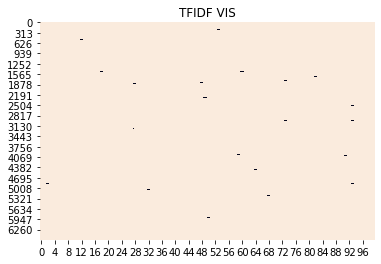

In [8]:
import sklearn

# tfidf
vectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_features=10000, ngram_range=(1,2))
vectorizer.fit(data_train["sentence_clean"])
x_train = vectorizer.transform(data_train["sentence_clean"])
x_test = vectorizer.transform(data_test["sentence_clean"])

# lets visualize the tfidf vectors
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.heatmap(x_train.todense()[:,np.random.randint(0, x_train.shape[1], 100)]==0, vmin=0, vmax=1, cbar=False).set_title('TFIDF VIS')
plt.show()

# see how sparse it is. We can do some minimal feature selection and make it better

In [9]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(x_train, y_train)
pred_y = classifier.predict(x_test)
acc = sklearn.metrics.accuracy_score(y_test, pred_y)
print(acc)

0.7890909090909091


## Word2Vec

As seen before, TF-IDF, BOW, etc do not capture the context of the words, they are sparse and extremely large making it difficult to use. Word2Vec is a class of methods used to derive better word representations. 

Two commonly used Word2Vec techniques are:
- CBOW
- SkipGram

![](assets/word2vec.png)

In [ ]:
!wget -q --show-progress 'http://nlp.stanford.edu/data/glove.6B.zip' -O 'glove.zip'
!unzip -j -q 'glove.zip' 'glove.6B.300d.txt' -d './'

In [10]:
# clean again but without lemmatization
def process_text(text):
    # make lower case and remove extra spaces
    text = str(text).lower()
    # remove punctuations
    text = re.sub(r'[^\w\s]', '', text)
    # convert to word tokens
    tokens = text.split()
    # remove stop words
    tokens = [t for t in tokens if t not in stopwords]
    return tokens

data["sentence_tokens"] = data["sentence"].apply(lambda x: process_text(x))
data.head()

,sentence,label,split,sentence_clean,sentence_tokens
0,The Rock is destined to be the 21st Century 's...,1,1,rock destined 21st century new conan going mak...,"[rock, destined, 21st, century, new, conan, go..."
1,The gorgeously elaborate continuation of `` Th...,1,1,gorgeously elaborate continuation lord ring tr...,"[gorgeously, elaborate, continuation, lord, ri..."
2,If you sometimes like to go to the movies to h...,1,2,sometimes like go movie fun wasabi good place ...,"[sometimes, like, go, movies, fun, wasabi, goo..."
3,"Emerges as something rare , an issue movie tha...",1,2,emerges something rare issue movie honest keen...,"[emerges, something, rare, issue, movie, hones..."
4,Offers that rare combination of entertainment ...,1,2,offer rare combination entertainment education,"[offers, rare, combination, entertainment, edu..."


In [11]:
from collections import Counter
word_freq = Counter()
for i in data["sentence_tokens"]:
    word_freq.update(i)
words = [w for w in word_freq.keys() if word_freq[w] > 1]
word_map = {k: v + 1 for v, k in enumerate(words)}  
word_map['<unk>'] = len(word_map) + 1
word_map['<pad>'] = 0
print("vocabulary size: {}".format(len(word_map)))

vocabulary size: 8296


In [12]:
import torch

vocab = set(word_map.keys())
print("Loading embedding...")
cnt = 0
with open("glove.6B.300d.txt", 'r', encoding='utf-8') as f:
    emb_dim = len(f.readline().split(' ')) - 1 

embeddings = torch.FloatTensor(len(vocab), emb_dim)
bias = np.sqrt(3.0 / embeddings.size(1))
torch.nn.init.uniform_(embeddings, -bias, bias)

for line in open("glove.6B.300d.txt", 'r', encoding='utf-8'):
    line = line.split(' ')
    emb_word = line[0]
    embedding = list(map(lambda t: float(t), filter(lambda n: n and not n.isspace(), line[1:])))
    if emb_word not in vocab:
        continue
    else:
        cnt+=1
    embeddings[word_map[emb_word]] = torch.FloatTensor(embedding)

print("Number of words read: ", cnt)
print("Number of OOV: ", len(vocab)-cnt)

Loading embedding...
Number of words read:  8015
Number of OOV:  281


In [13]:
from torch.utils.tensorboard import SummaryWriter
import tensorflow as tf
import tensorboard as tb
tf.io.gfile = tb.compat.tensorflow_stub.io.gfile

writer = SummaryWriter("emb_vis")
writer.add_embedding(
    embeddings,
    metadata=vocab
)
writer.close()

In [14]:
%load_ext tensorboard
%tensorboard --logdir "emb_vis"

In [15]:
import torch.nn as nn
cos = nn.CosineSimilarity(dim=0, eps=1e-6)
interp_embed = embeddings[word_map["king"]] - embeddings[word_map["man"]] + embeddings[word_map["woman"]]
cos(interp_embed, embeddings[word_map["queen"]])

tensor(0.6896)

## Sequential Neural Networks

**RNN**

Traditional Neural Networks inherently do not remember/recall the previous words before predicting the current word. Hence they are not apt for language understanding as there is an order in the words which provides the context. Recurrent Neural Networks or RNN's address this issue and help retain past information for the current prediction.

![](assets/rnn.png)

**LSTM**

However, RNN's tend to fail when given a large sequence. Hence came LSTM's which can model long-range dependencies. Let's try to understand how?

![](assets/lstm-1.png)

**Cell state**

Something like a conveyor belt carrying information through the entire chain, with minor alterations at every step. These alterations are done using gates (3 to be exact). They help propagate information based on requirement. Every gating layer consists of a sigmoid operation which determines how much information passes through (1-let everything and 0-let nothing through).

![](assets/lstm-2.png)

**Gates**

- Modify existing information
![](assets/lstm-3.png)
- Add new information from the current state
![](assets/lstm-4.png)
- Choose what the output is going to be
![](assets/lstm-5.png)

In [19]:
from torch.autograd import Variable
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence

class LSTMCls(nn.Module):
    def __init__(self, vocab_size, emb_dim, embedding, hid_dim, n_cls):
        super(LSTMCls, self).__init__()
        self.embedding = nn.Embedding(vocab_size, emb_dim).from_pretrained(embedding, freeze=False)
        self.lstm = nn.LSTM(emb_dim, hid_dim)
        self.fc = nn.Linear(hid_dim, n_cls)
        self.hid_dim = hid_dim

    def forward(self, x):
        x = self.embedding(x).transpose(0,1)
        h_0 = Variable(torch.zeros(1, x.shape[1], self.hid_dim).to(x.device))
        c_0 = Variable(torch.zeros(1, x.shape[1], self.hid_dim).to(x.device))
        _, (x, _) = self.lstm(x, (h_0, c_0))
        x = self.fc(x[-1])
        x = F.log_softmax(x, dim=-1)
        return x

class CNNCls(nn.Module):
    def __init__(self, vocab_size, emb_dim, embedding, fmaps, strides, dropout_factor, num_classes):
        super(CNNCls, self).__init__()
        self.embedding = nn.Embedding(vocab_size, emb_dim).from_pretrained(embedding, freeze=False)
        conv_layers = [nn.Conv2d(1, fmaps, (stride, emb_dim), padding=(stride-1, 0)) for stride in strides]
        self.conv_layers = nn.Sequential(*conv_layers)
        self.dropout = nn.Dropout(dropout_factor)
        self.fc = nn.Linear(len(conv_layers)*fmaps, num_classes)
    def forward(self, x):
        x = self.embedding(x).unsqueeze(1)
        x = [F.relu(conv(x)).squeeze(3) for conv in self.conv_layers]
        x = [F.max_pool1d(c, c.size(2)).squeeze(2) for c in x]
        x = torch.cat(x, 1)
        x = self.dropout(x)
        x = self.fc(x)
        x = F.log_softmax(x, dim=-1)
        return x

class ClsDataset(Dataset):
    def __init__(self, word_map, data, split="train"):
        if split == "train":
            data = data[data["split"] == 1]
        else:
            data = data[data["split"] == 3]
        data = data.reset_index(drop=True)
        self.sentence = data["sentence_tokens"]
        self.label = data["label"]
        self.word_map = word_map
    
    def __getitem__(self, indx):
        sent = self.sentence[indx]
        label = self.label[indx]
        sent = [self.word_map.get(w, self.word_map["<unk>"]) for w in sent]
        return torch.LongTensor(sent), label
    
    def __len__(self):
        return len(self.sentence)

def pad_collate(batch):
    sent, label = zip(*batch)
    sent_pad = pad_sequence(sent, batch_first=True, padding_value=0)
    return sent_pad, torch.LongTensor(label)    

device = torch.device("cuda")
cls_model = LSTMCls(len(word_map), embeddings.shape[1], embeddings, 256, 2).to(device)
# cls_model = CNNCls(len(word_map), embeddings.shape[1], embeddings, 100, [3,4,5], 0.5, 2).to(device)
train_dset = ClsDataset(word_map, data)
test_dset = ClsDataset(word_map, data, split="test")

train_loader = DataLoader(train_dset, batch_size=32, num_workers=4, shuffle=True, collate_fn=pad_collate)
test_loader = DataLoader(test_dset, batch_size=32, num_workers=4, shuffle=False, collate_fn=pad_collate)    

In [17]:
import torch.nn.functional as F
import torch

optim = torch.optim.Adam(cls_model.parameters(), lr=1e-3)

# non tqdm progress bar UwU
def progress_bar(progress = 0, status = "", bar_len = 20):
    status = status.ljust(30)
    block = int(round(bar_len*progress))
    text = "\rProgress: [{}] {}% {}".format( "#"*block + "-"*(bar_len-block), round(progress*100,2), status)
    print(text, end="")
    if progress == 1:
        print()

for epoch in range(10):
    print("---------------")
    print(f"Epoch: {epoch}")
    cls_model.train()
    loss_cntr, acc_cntr = [], []
    for indx, (sent, cls) in enumerate(train_loader):
        sent, cls = sent.to(device), cls.to(device)
        out = cls_model(sent)
        loss = F.nll_loss(out, cls)

        optim.zero_grad()
        loss.backward()
        optim.step()

        # log metrics
        loss_cntr.append(loss.item())
        pred_choice = out.max(1)[1]
        correct = pred_choice.eq(cls.long().data).cpu().sum()
        acc_cntr.append(correct.item()/sent.shape[0])

        progress_bar(indx/len(train_loader), status=f"train loss: {round(np.mean(loss_cntr), 4)}, acc: {round(np.mean(acc_cntr), 4)}")
    progress_bar(1, status=f"train loss: {round(np.mean(loss_cntr), 4)}, acc: {round(np.mean(acc_cntr), 4)}")
    
    cls_model.eval()
    acc_cntr = []
    for indx, (sent, cls) in enumerate(test_loader):
        sent, cls = sent.to(device), cls.to(device)
        with torch.no_grad():
            out = cls_model(sent)
        pred_choice = out.max(1)[1]
        correct = pred_choice.eq(cls.long().data).cpu().sum()
        acc_cntr.append(correct.item()/sent.shape[0])

        progress_bar(indx/len(test_loader), status=f"test acc: {round(np.mean(acc_cntr), 4)}")
    progress_bar(1, status=f"test acc: {round(np.mean(acc_cntr), 4)}")
    
    

---------------
Epoch: 0
Progress: [####################] 100% train loss: 0.5349, acc: 0.722222
Progress: [####################] 100% test acc: 0.8074                
---------------
Epoch: 1
Progress: [####################] 100% train loss: 0.3428, acc: 0.858888
Progress: [####################] 100% test acc: 0.7976                
---------------
Epoch: 2
Progress: [####################] 100% train loss: 0.2246, acc: 0.916666
Progress: [####################] 100% test acc: 0.8048                
---------------
Epoch: 3
Progress: [####################] 100% train loss: 0.1474, acc: 0.948686
Progress: [####################] 100% test acc: 0.8072                
---------------
Epoch: 4
Progress: [####################] 100% train loss: 0.0909, acc: 0.968888
Progress: [####################] 100% test acc: 0.7859                
---------------
Epoch: 5
Progress: [####################] 100% train loss: 0.0718, acc: 0.978383
Progress: [####################] 100% test acc: 0.8024         